In [12]:
import tensorflow as tf
import sys
import os
import cv2
from mxnet import gluon, image, nd
from mxnet.gluon import data as gdata, utils as gutils
import d2l
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import mxnet

voc_dir = "C:\\Users\\bhatt\\Desktop\\Jupyter Notebook\\VOCdevkit\\VOC2012"

def read_voc_images(root=voc_dir, is_train=True):
    txt_fname = '%s/ImageSets/Segmentation/%s' % (
        root, 'train.txt' if is_train else 'val.txt')
    with open(txt_fname, 'r') as f:
        images = f.read().split()
    features, labels = [None] * len(images), [None] * len(images)
    for i, fname in enumerate(images):
        features[i] = image.imread('%s/JPEGImages/%s.jpg' % (root, fname))
        labels[i] = image.imread(
            '%s/SegmentationClass/%s.png' % (root, fname))

    return features, labels

#train_features, train_labels = read_voc_images()



In [ ]:
import tensorflow as tf
import sys
import os
import cv2
from mxnet import gluon, image, nd
from mxnet.gluon import data as gdata, utils as gutils
import d2l
import numpy as np
import sklearn
import mxnet

voc_dir_features = "C:\\Users\\bhatt\\Desktop\\Jupyter Notebook\\VOCdevkit\\VOC2012\\"
voc_dir_labels = "C:\\Users\\bhatt\\Desktop\\Jupyter Notebook\\VOCdevkit\\VOC2012\\"

def read_voc_images(root=voc_dir, is_train=True):
    txt_fname = '%s/ImageSets/Segmentation/%s' % (
        root, 'train.txt' if is_train else 'val.txt')
    with open(txt_fname, 'r') as f:
        images = f.read().split()
    features, labels = [None] * len(images), [None] * len(images)
    total_features=0
    for i, fname in enumerate(images):
        labels[i] =  cv2.imread(os.path.join(voc_dir_labels,'%s/SegmentationClass/%s.jpg' % (root, fname)))
        features[i] = cv2.imread(os.path.join(voc_dir_features,'%s/JPEGImages/%s.jpg' % (root, fname))) 
        if ((np.ndim(features[i]))>2) and ((np.ndim(labels[i]))>2):
            features[i] = cv2.imread(os.path.join(voc_dir_features,'%s/JPEGImages/%s.jpg' % (root, fname))) 
            labels[i] =  cv2.imread(os.path.join(voc_dir_labels,'%s/SegmentationClass/%s.jpg' % (root, fname)))
            total_features = total_features + i
        else:  # in the interest in keeping the output clean...
            pass
    for i in range(20):
        print(i)
        print(np.ndim(features[i]))
        print(features[i].shape)
        print(np.ndim(labels[i]))
        print(labels[i].shape)
    print(total_features)
    print(len(features))
    print(len(labels))
    return features, labels

train_features, train_labels = read_voc_images()

In [ ]:
n = 20
imgs = train_features[1424+n:1444+n] + train_labels[1424+n:1444+n]
img = train_features[1000] + train_labels[1000]

d2l.show_images(imgs, 2, n);


In [ ]:
def resize(features,labels):
    feature=[]
    label=[]
    for i in range(1464):
        print(i)
        feature[i] = features[i].resize((width, height), Image.BICUBIC)  
        label[i] = labels[i].resize((width, height), Image.BICUBIC)  
        print(i)
    return features,labels

train_features, train_labels = resize(train_features, train_labels)

In [ ]:
def resize(features,labels):
    feature=[]
    label=[]
    for i in range(1464):
        print(i)
        feature.append(cv2.resize(cv2.UMat(np.array(features[i]), dtype = np.float32),(512,512)))
        #label.append(cv2.resize(cv2.UMat(np.array(labels[i]), dtype = np.float32),(512,512)))
        #feature.append(features[i])
        print(i)
    return features,labels

train_features, train_labels = resize(train_features, train_labels)
#n = 20
#imgs = train_features[1424+n:1444+n] + train_labels[1424+n:1444+n]
#img = train_features[1000] + train_labels[1000]

#d2l.show_images(imgs, 2, n);

In [2]:
txt_fname = 'C:\\Users\\bhatt\\Desktop\\Jupyter Notebook\\VOCdevkit\\VOC2012\\ImageSets\\Segmentation\\train.txt'

In [3]:
with open(txt_fname, 'r') as f:
        images = f.read().split()

In [4]:
len(images)

1464

In [5]:
label =  cv2.imread('C:\\Users\\bhatt\\Desktop\\Jupyter Notebook\\VOCdevkit\\VOC2012\\SegmentationClass\\' + images[0] + '.png')

In [6]:
np.shape(label)

(281, 500, 3)

In [7]:
labels = []
features = []
for i in range(len(images)):
    labels.append(cv2.resize(cv2.imread('C:\\Users\\bhatt\\Desktop\\Jupyter Notebook\\VOCdevkit\\VOC2012\\SegmentationClass\\' + images[i] + '.png'), (512, 512)))
    features.append(cv2.resize(cv2.imread('C:\\Users\\bhatt\\Desktop\\Jupyter Notebook\\VOCdevkit\\VOC2012\\JPEGImages\\' + images[i] + '.jpg'), (512, 512)))

In [8]:
len(features)

1464

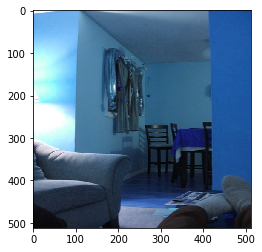

In [16]:
plt.imshow(features[55])

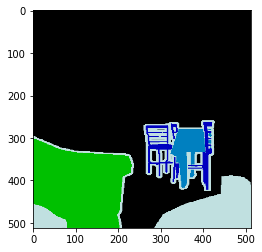

In [17]:
plt.imshow(labels[55])

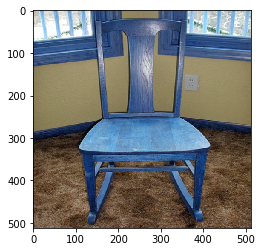

In [20]:
plt.imshow(features[316])

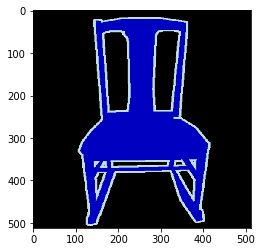

In [21]:
plt.imshow(labels[316])